In [19]:
import importlib

import pandas as pd
import numpy as np
from collections import Counter
import mysklearn.myutils
importlib.reload(mysklearn.myutils)
import mysklearn.myutils as myutils

import mysklearn.mypytable
importlib.reload(mysklearn.mypytable)
from mysklearn.mypytable import MyPyTable 

import mysklearn.myclassifiers
importlib.reload(mysklearn.myclassifiers)
from mysklearn.myclassifiers import MyKNeighborsClassifier, MyDummyClassifier, MyNaiveBayesClassifier, MyDecisionTreeClassifier, MyRandomForestClassifier

import mysklearn.myevaluation
importlib.reload(mysklearn.myevaluation)
import mysklearn.myevaluation as myevaluation

import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder


# ✈️ Flight Delay Classification ✈️
### Authors: Izzy May and Drew Fitzpatrick
### Course: CPSC 322, Fall 2024

## Introduction

Flight delays are a critical concern in aviation, impacting passengers, airlines, and airport operations. In this project, we aim to predict flight delays based on various flight-related attributes using three classification algorithms: Naive Bayes (NB), Decision Tree, and Random Forest.  

1. **Naive Bayes (NB):** A probabilistic model assuming feature independence.
2. **Decision Tree:** A non-linear classifier that splits data into decision-based regions.
3. **Random Forest:** An ensemble method combining multiple decision trees to improve robustness and accuracy.

To perform the classification, we categorized delays into six groups based on delay duration:

- 0: No delay or early arrival.
- 1: Delay up to 30 minutes.
- 2: Delay between 31-60 minutes.
- 3: Delay between 61-120 minutes.
- 4: Delay between 121-180 minutes.
- 5: Delay exceeding 180 minutes.

Using 10-fold cross-validation to ensure comprehensive and generalizable performance metrics, we evaluate the performance of these classifiers based on metrics such as accuracy, precision, recall, F1-score, and confusion matrices.

### Findings Overview
Preliminary results from the classification task indicate that:

- **Random Forest** outperforms the other models in terms of accuracy and F1-score, benefiting from its ability to model complex feature interactions and handle feature variability.
- **Decision Tree** performs competitively, though its performance is slightly less robust compared to the ensemble approach of Random Forest.
- **Naive Bayes** achieves moderate performance, reflecting its assumptions about feature independence that may not fully align with the dataset's characteristics.



## Dataset Description
The dataset used for this project consists of flight information, originally sourced from Kaggle, and preprocessed to facilitate the prediction of flight delays. Below is an overview of the dataset:

1. **Balancing:** The cleaned dataset, balanced_flights.csv, contains flight information balanced for analytical purposes and to maintain the integrity of the predictive models. The original dataset with over 337,000 instances was balanced by randomly selecting attributes to ensure even representation across delay categories:
    - 0 (On Time): 300 instances
    - 1 (0–30 mins): 300 instances
    - 2 (30–60 mins): 300 instances
    - 3 (1–2 hours): 300 instances
    - 4 (2–3 hours): 300 instances
    - 5 (Over 3 hours): 300 instances

2. **Features:** 
- Time-based Attributes: year, month, day, hour, minute, dep_time, and sched_dep_time.
- Operational Attributes: carrier, flight, and tailnum.
- Location and Flight Characteristics: origin, dest, distance, and air_time.
- Delay Attributes: dep_delay and arr_delay (categorized into delay categories as the target variable).

4. **Classification Target Features:**
- The delay category, which groups flights based on their departure delay duration, serves as the classification target.

3. **Classification Prediction Features**
- The correlation matrix below details the relationships between the numerical features in the dataset and how they contribute to predicting the dep_delay (departure delay). 
    - dep_time: Correlation with arr_delay = 0.17 — While the departure time shows a small positive correlation, it suggests a weak connection to the arrival delay, but may still affect the model in certain contexts.
    - sched_dep_time: Correlation with arr_delay = 0.18 — Scheduled departure time has a modest correlation, indicating that timing deviations from the schedule may influence arrival delays slightly.
    - arr_time: Correlation with arr_delay = -0.15 — The arrival time has a weak negative correlation with arrival delay, which might indicate that later arrival times slightly reduce the delay in certain cases.
    - sched_arr_time: Correlation with arr_delay = 0.10 — Scheduled arrival time has a slight positive correlation with arrival delay, suggesting that earlier or later scheduled times has some correlation with the final delay.
    - hour: Correlation with arr_delay = 0.18 — The hour of the day has a modest positive correlation, indicating that certain times of day likely are associated with higher or lower delays, such as peak travel hours.
- Additionally, the categorical features we selected (carrier, flight, tailnum, origin, dest) were based on the graph analysis we performed before beginning our classification due to their likely correlation with flight delays.

**Preprocessing:**
- **Categorical** Encoding: Features like carrier, flight, tailnum, origin, and dest were label-encoded to numerical representations for compatibility with the classification models.
- **Scaling:** Numerical features were standardized using StandardScaler to ensure uniform feature scaling for algorithms sensitive to feature magnitude.

### Correlation Matrix (Balanced Flights)

In [20]:
file_path = 'balanced_flights.csv' 
correlation_matrix = myutils.analyze_flight_data(file_path)
print(correlation_matrix)

                dep_time  sched_dep_time  dep_delay  arr_time  sched_arr_time  \
dep_time        1.000000        0.653543   0.178397  0.240977        0.602714   
sched_dep_time  0.653543        1.000000   0.192042  0.052987        0.569028   
dep_delay       0.178397        0.192042   1.000000 -0.174653        0.115518   
arr_time        0.240977        0.052987  -0.174653  1.000000        0.316178   
sched_arr_time  0.602714        0.569028   0.115518  0.316178        1.000000   
arr_delay       0.165804        0.176780   0.971516 -0.154633        0.100755   
air_time        0.020748        0.001055  -0.038113  0.004113        0.029841   
distance        0.024817        0.012884  -0.031642 -0.020409        0.028598   
month           0.032402        0.024277  -0.003729 -0.025375        0.013663   
hour            0.652924        0.999037   0.192734  0.052287        0.570292   

                arr_delay  air_time  distance     month      hour  
dep_time         0.165804  0.020748  0.0

### Flight Dataset Visualizations

#### Figure 1: Distribution of Flight Delay Categories

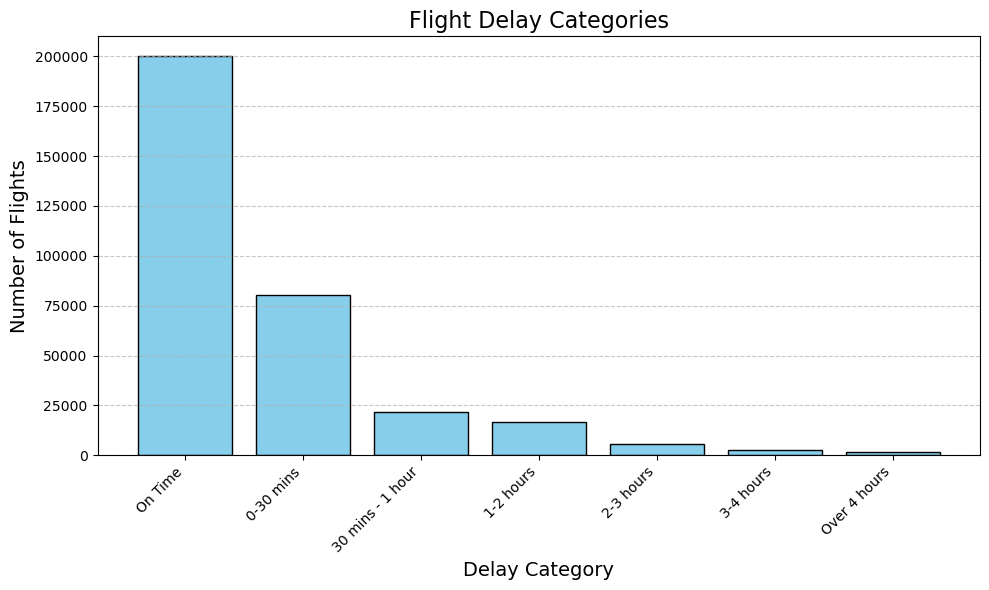

In [21]:
from mysklearn import myutils 
file_path = "flights.csv"
myutils.visualize_flight_delays(file_path)

Figure 1 presents a bar chart illustrating the distribution of flight delays across various categories. The x-axis categorizes delays into bins: On Time, 0-30 minutes, 30 minutes to 1 hour, 1-2 hours, 2-3 hours, 3-4 hours, and Over 4 hours. The y-axis represents the number of flights falling into each category.

The chart reveals that the majority of flights operate on time, with the corresponding bar significantly taller than others. This indicates that the airline has a strong track record of punctuality. As the delay duration increases, the number of flights in each category steadily declines, suggesting that longer delays are less frequent. This is generally desirable for passenger satisfaction.

However, to maintain accurate classification and avoid bias, it's essential to balance the selection of attributes from each delay category. Overemphasizing certain categories, such as on-time flights, could skew the model's ability to accurately predict and classify flights with longer delays. Therefore, a careful selection of attributes that represent the diversity of delay scenarios is necessary to ensure a robust and unbiased classification model.

#### Figure 2: Distribution of Flight Delay Categories (Balanced Data)

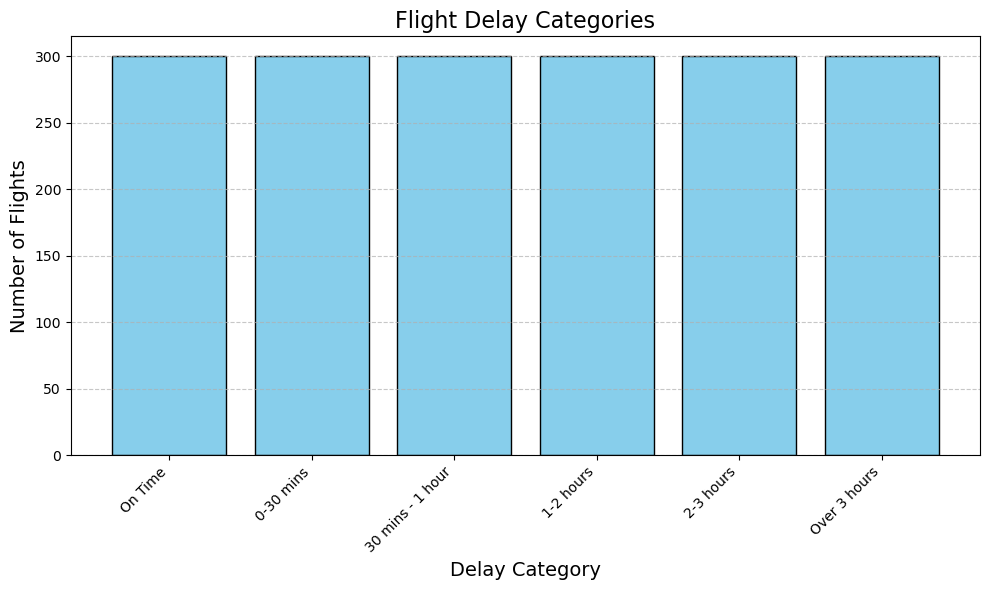

In [22]:
file_path = "balanced_flights.csv"
myutils.visualize_flight_delays_balanced(file_path)

Figure 2 presents a bar chart illustrating the distribution of flight delays across the same 6 categories as Figure 1. However, in the balanced dataset, each category has an even number (300) of instances. To improve the accuracy of classification models, it's crucial to consider the balanced distribution of data points across all delay categories. This will help the model learn the nuances of each category and avoid biases towards specific delay durations. 

#### Figure 3: Average Flight Delay by Airline

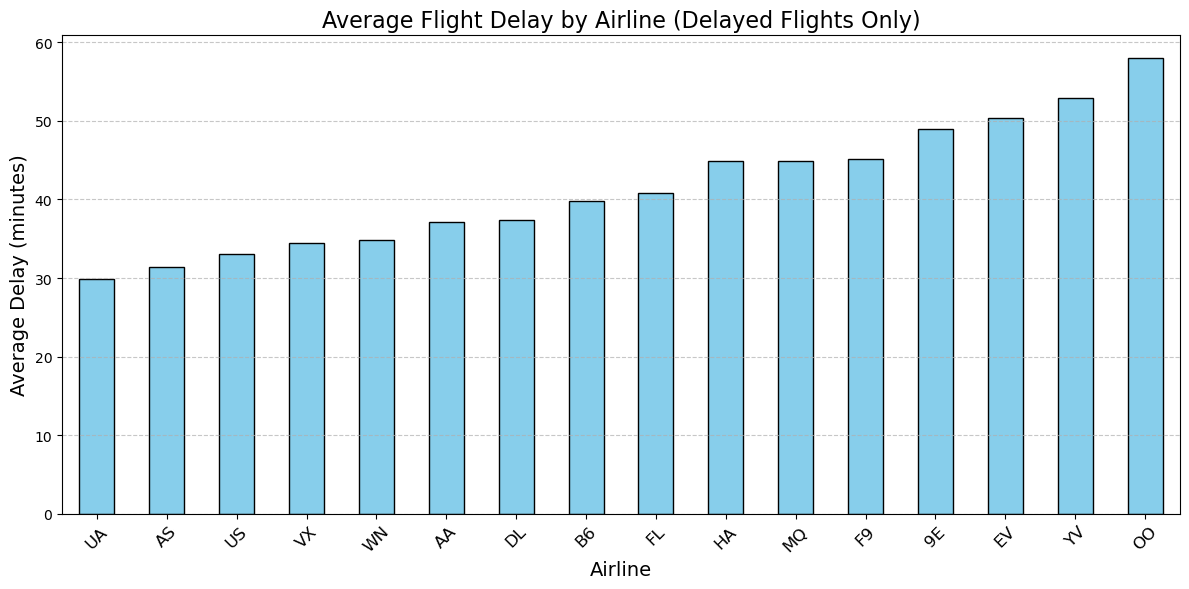

In [23]:
file_path = "flights.csv"
myutils.visualize_delays_by_airline(file_path)

Figure 3 presents a bar chart illustrating the average flight delay by airline for delayed flights only. The x-axis lists various airlines, while the y-axis represents the average delay in minutes.

The chart reveals a significant variation in average delay times across different airlines. Some airlines have significantly higher average delays compared to others. This disparity suggests that certain airlines may have operational challenges or factors that contribute to more frequent or longer delays. This graph encourages us to include airline as a classification category to improve the accuracy of our delay prediction model.

#### Figure 4 On Time vs. Delayed Flights by Airline

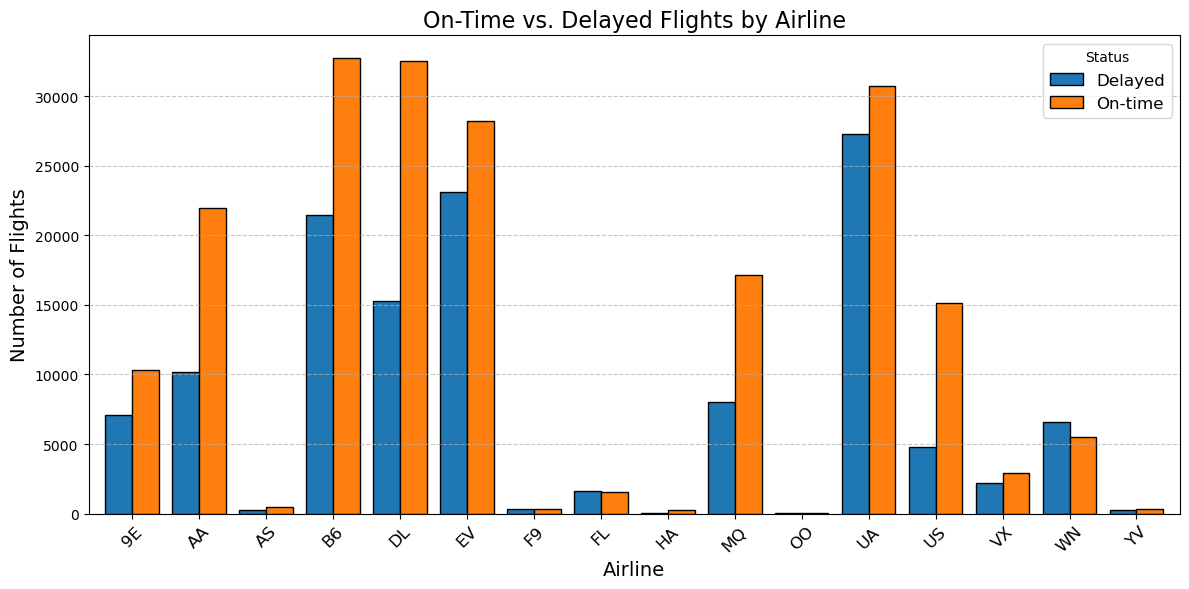

In [24]:
file_path = "flights.csv"
myutils.on_time_vs_delayed_by_airline(file_path)

Figure 4 presents a bar chart illustrating the number of on-time and delayed flights by airline. The x-axis lists various airlines, while the y-axis represents the number of flights. Each airline is represented by two bars: one for on-time flights and one for delayed flights.

The chart reveals significant variation in the proportion of on-time and delayed flights across different airlines. Some airlines have a higher number of delayed flights compared to on-time flights, while others exhibit the opposite trend. This figure provides even more evidence to suggest that airline impacts departure delay when paired with Figure 3.

#### Figure 5: Average Flight Delay by Time of Day

/home/DataScienceFinal/mysklearn/myutils.py:710: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delay_by_hour = delayed_flights.groupby('sched_hour')['dep_delay'].mean()


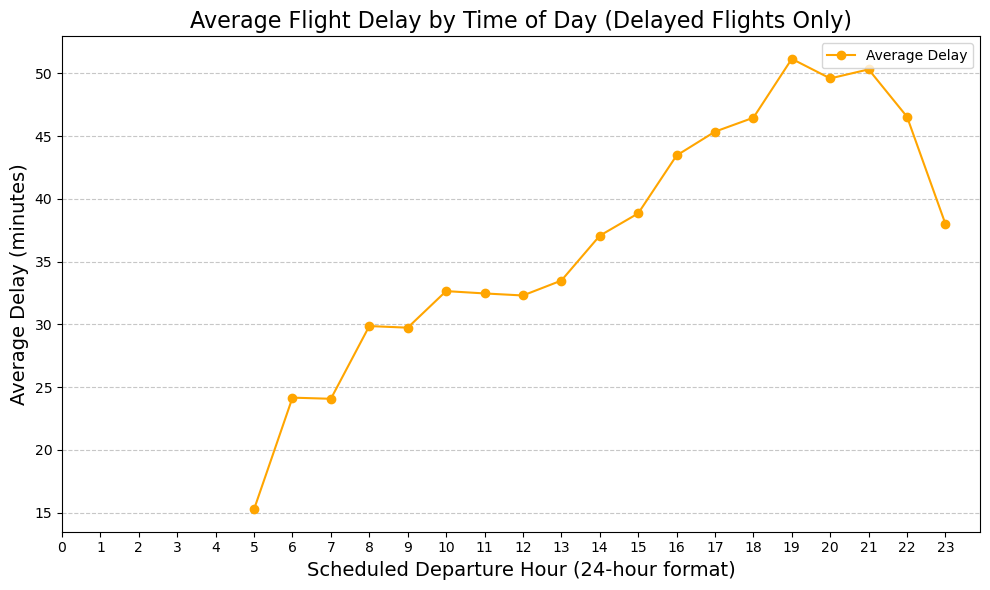

In [25]:
file_path = "flights.csv"
myutils.visualize_delays_by_time_of_day(file_path)

Figure 5 clearly shows a pattern of flight delays varying across different times of the day. We can observe several key points:

- Peak Delay Periods: The graph reveals distinct peak periods for flight delays. There is a significant increase in average delays around the early afternoon (13-15 hours) and late evening (18-20 hours). These periods likely correspond to peak travel times or periods with increased air traffic congestion.
- Early Morning and Late Night Trends: Interestingly, the graph shows lower average delays during the early morning and late night hours. This could be attributed to reduced air traffic during these times, leading to fewer delays.
- Consistent Pattern: The overall trend suggests a consistent pattern of delays throughout the day, with certain time slots being more prone to delays than others.

Including time of day as one of our prediction attributes allows our model to leverage the information to identify high-risk periods and thus significantly enhance the accuracy and effectiveness of our flight delay prediction model.

## Classification Results
In this section, we detail the approach and performance of the classifiers developed for the task. The three classifiers evaluated are k-Nearest Neighbors (kNN), Naive Bayes, and Random Forest. Each classifier was assessed based on accuracy, error rate, precision, recall, and F1 score, with their respective confusion matrices used to evaluate their predictive ability across different categories.

### Prepping Data for Classification tasks using K-Fold cross-validation
This code prepares the flight dataset by extracting relevant features and the target variable, then sets up the K-Fold cross-validation framework to evaluate the model's performance across 10 different splits. The performance metrics are stored for further analysis to identify the best model.

In [26]:
import pandas as pd
from sklearn.model_selection import KFold

# Load data
data = pd.read_csv('test_flights.csv')

# Compute flight delay (in minutes, assuming sched_dep_time and dep_time are timestamps or integers)
data['flight_delay'] = data['sched_dep_time'] - data['dep_time']

# Extract meaningful features for predicting delays
X = data[[
    'year', 'month', 'day', 'hour', 'minute',  # Time-based features
    'carrier', 'flight', 'tailnum',            # Operational features
    'origin', 'dest', 'distance', 'air_time', # Location & flight characteristics
    'dep_delay', 'sched_dep_time'             # Existing delay and timing
]]

# Target variable: flight delay
y = data['flight_delay']

# Initialize K-Fold cross-validation (10 splits)
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Placeholder for performance metrics
accuracies, error_rates, precisions, recalls, f1_scores, confusion_matrices = [], [], [], [], [], []


### Preprocessing Flight Delay Data and Feature Scaling

This code performs preprocessing tasks such as categorizing flight delays, label encoding categorical features, and scaling numerical features. The result is a dataset ready for training machine learning models, with features standardized and delays categorized for classification.

In [27]:
import numpy as np
import pandas as pd

# Load the dataset (assuming `data` is a pandas DataFrame containing the provided sample data)
data = pd.read_csv('balanced_flights.csv') 

# Define delay categories
def categorize_delay(delay):
    if delay <= 0:
        return 0
    elif 0 < delay <= 30:
        return 1
    elif 30 < delay <= 60:
        return 2
    elif 60 < delay <= 120:
        return 3
    elif 120 < delay <= 180:
        return 4
    else:
        return 5

# Map delays to categories
data['delay_category'] = data['dep_delay'].apply(categorize_delay)

# Convert categorical features to integers (label encoding)
categorical_cols = ['carrier', 'flight', 'tailnum', 'origin', 'dest']  # List your categorical columns
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col].astype(str))  # Convert to string if necessary and apply label encoding
    label_encoders[col] = le  # Store the encoder to use it later if needed

# Prepare features (X) and labels (y)
X = data[['dep_time', 'sched_dep_time', 'sched_arr_time', 'air_time', 'dest',
          'carrier', 'hour']].fillna(0)

y = data['delay_category'].values

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


### kNN Performance Evaluation & Confusion Matrix

In [28]:
import numpy as np
import pandas as pd

X = np.array(X) 
y = np.array(y) 

# Initialize StratifiedKFold with k=10 (assuming myevaluation provides this utility)
kf = myevaluation.stratified_kfold_split(X, y, n_splits=10, random_state=None, shuffle=False)

# Initialize lists to store metrics (accuracy, precision, recall, f1, confusion matrices, etc.)
knn_accuracies, knn_precisions, knn_recalls, knn_f1s, knn_conf_matrices = [], [], [], [], []

# Initialize lists to gather true and predicted values across all folds
all_y_true = []
all_y_pred = []

# Define the correct labels for the confusion matrix and metrics
labels = [0, 1, 2, 3, 4, 5]

# Loop over each fold
for train_index, test_index in kf:
    knn_X_train, knn_X_test = X[train_index], X[test_index]
    knn_y_train, knn_y_test = y[train_index], y[test_index]

    # Initialize and fit MyKNeighborsClassifier
    knn_model = MyKNeighborsClassifier()
    knn_model.fit(knn_X_train.tolist(), knn_y_train.tolist())
    
    # Make predictions on the test set
    knn_y_pred = knn_model.predict(knn_X_test.tolist())
    
    # Calculate and store metrics for this fold
    accuracy = myevaluation.accuracy_score(knn_y_test, knn_y_pred)
    precision_score = myevaluation.binary_precision_score(knn_y_test, knn_y_pred, labels= labels)  # Multi-class precision
    recall_score = myevaluation.binary_recall_score(knn_y_test, knn_y_pred, labels= labels)  # Multi-class recall
    f1 = myevaluation.binary_f1_score(knn_y_test, knn_y_pred, labels= labels)  # Multi-class F1 score
    confusion_matrix = myevaluation.confusion_matrix(knn_y_test, knn_y_pred, labels=labels)

    # Store fold metrics
    knn_accuracies.append(accuracy)
    knn_precisions.append(precision_score)
    knn_recalls.append(recall_score)
    knn_f1s.append(f1)
    knn_conf_matrices.append(confusion_matrix)
    
    # Collect all true and predicted labels for final confusion matrix
    all_y_true.extend(knn_y_test)
    all_y_pred.extend(knn_y_pred)

# Calculate the final confusion matrix using all folds' predictions
final_confusion_matrix = myevaluation.confusion_matrix(all_y_true, all_y_pred, labels=labels)
matrix_with_totals = myutils.calculate_confusion_matrix_totals(final_confusion_matrix)

In [29]:
print("===========================================")
print("kNN Classifier Performance")
print("===========================================")

# Calculate and print average performance
print(f"Accuracy: {np.mean(knn_accuracies):.2f}")
print(f"Error: {1 - np.mean(knn_accuracies):.2f}")
print(f"Precision: {np.mean(knn_precisions):.2f}")
print(f"Recall: {np.mean(knn_recalls):.2f}")
print(f"F1 Score: {np.mean(knn_f1s):.2f}\n")

# Display the confusion matrix
print("Confusion Matrix:")
myutils.display_confusion_matrix(matrix_with_totals, labels)

kNN Classifier Performance
Accuracy: 0.63
Error: 0.37
Precision: 0.58
Recall: 0.68
F1 Score: 0.62

Confusion Matrix:
  Delayed    0    1    2    3    4    5    Total    Recognition %
---------  ---  ---  ---  ---  ---  ---  -------  ---------------
        0  204   89    6    1    0    0      300            68.00
        1  118  140   39    3    0    0      300            46.67
        2   30   80  142   46    2    0      300            47.33
        3    3   12   59  187   39    0      300            62.33
        4    0    0    2   51  209   38      300            69.67
        5    0    0    1    5   47  247      300            82.33


### Naive Bayes Evaluation & Confusion Matrix

In [30]:
import numpy as np
import pandas as pd

X = np.array(X) 
y = np.array(y) 

# Initialize StratifiedKFold with k=10
kf = myevaluation.stratified_kfold_split(X, y, n_splits=10, random_state=None, shuffle=False)

# Initialize lists to store metrics
nb_accuracies, nb_precisions, nb_recalls, nb_f1s, nb_conf_matrices = [], [], [], [], []

# Initialize lists to collect all true and predicted labels across all folds
all_y_true = []
all_y_pred = []

# Define the correct labels for the confusion matrix and metrics
labels = [0, 1, 2, 3, 4, 5]

# Loop over each fold in Stratified K-Fold
for train_index, test_index in kf:
    nb_X_train, nb_X_test = X[train_index], X[test_index]
    nb_y_train, nb_y_test = y[train_index], y[test_index]

    # Initialize and fit MyNaiveBayesClassifier
    nb_model = MyNaiveBayesClassifier()
    nb_model.fit(nb_X_train.tolist(), nb_y_train.tolist())
    
    # Make predictions on the test set
    nb_y_pred = nb_model.predict(nb_X_test.tolist())
    
    # Calculate and store metrics for this fold
    accuracy = myevaluation.accuracy_score(nb_y_test, nb_y_pred)
    error = 1 - accuracy
    precision_score = myevaluation.binary_precision_score(nb_y_test, nb_y_pred, labels=labels)
    recall_score = myevaluation.binary_recall_score(nb_y_test, nb_y_pred, labels=labels)
    f1 = myevaluation.binary_f1_score(nb_y_test, nb_y_pred, labels=labels)
    confusion_matrix = myevaluation.confusion_matrix(nb_y_test, nb_y_pred, labels=labels)

    # Store metrics for this fold
    nb_accuracies.append(accuracy)
    nb_precisions.append(precision_score)
    nb_recalls.append(recall_score)
    nb_f1s.append(f1)
    nb_conf_matrices.append(confusion_matrix)

    # Collect all true and predicted labels for final confusion matrix
    all_y_true.extend(nb_y_test)
    all_y_pred.extend(nb_y_pred)
   

# Calculate the final confusion matrix using all folds' predictions
final_confusion_matrix = myevaluation.confusion_matrix(all_y_true, all_y_pred, labels=labels)
matrix_with_totals = myutils.calculate_confusion_matrix_totals(final_confusion_matrix)

In [31]:
print("===========================================")
print("Naive Bayes Classifier Performance")
print("===========================================")

# Calculate and print average performance
print(f"Accuracy: {np.mean(nb_accuracies):.2f}")
print(f"Error: {1 - np.mean(nb_accuracies):.2f}")
print(f"Precision: {np.mean(nb_precisions):.2f}")
print(f"Recall: {np.mean(nb_recalls):.2f}")
print(f"F1 Score: {np.mean(nb_f1s):.2f}\n")

# Display the confusion matrix
print("Confusion Matrix:")
myutils.display_confusion_matrix(matrix_with_totals, labels)

Naive Bayes Classifier Performance
Accuracy: 0.22
Error: 0.78
Precision: 0.37
Recall: 0.36
F1 Score: 0.36

Confusion Matrix:
  Delayed    0    1    2    3    4    5    Total    Recognition %
---------  ---  ---  ---  ---  ---  ---  -------  ---------------
        0  109   45   44   32   30   40      300            36.33
        1   43   67   51   54   52   33      300            22.33
        2   49   51   46   66   48   40      300            15.33
        3   35   49   53   52   51   60      300            17.33
        4   40   50   36   55   53   66      300            17.67
        5   24   39   46   51   73   67      300            22.33


### Random Forest Performance Evaluation & Confusion Matrix

In [34]:
import pandas as pd
import importlib
import numpy as np

import mysklearn.myevaluation
importlib.reload(mysklearn.myevaluation)
import mysklearn.myevaluation as myevaluation


from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
import mysklearn.myclassifiers
importlib.reload(mysklearn.myclassifiers)
from mysklearn.myclassifiers import MyRandomForestClassifier

import mysklearn.myutils
importlib.reload(mysklearn.myutils)
import mysklearn.myutils as myutils


# Load data
data = pd.read_csv('balanced_flights.csv')

# Compute flight delay (in minutes, assuming sched_dep_time and dep_time are timestamps or integers)
data['flight_delay'] = data['sched_dep_time'] - data['dep_time']

# Extract meaningful features for predicting delays
X = data[[
    'year', 'month', 'day', 'hour', 'minute',  # Time-based features
    'carrier', 'flight', 'tailnum',            # Operational features
    'origin', 'dest', 'distance', 'air_time', # Location & flight characteristics
    'dep_delay', 'sched_dep_time'             # Existing delay and timing
]]

# Target variable: flight delay
y = data['flight_delay']

# Initialize K-Fold cross-validation (10 splits)
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Placeholder for performance metrics
accuracies, error_rates, precisions, recalls, f1_scores, confusion_matrices = [], [], [], [], [], []


# Load the dataset (assuming `data` is a pandas DataFrame containing the provided sample data)
data = pd.read_csv('test_flights.csv') 

# Define delay categories
def categorize_delay(delay):
    if delay <= 0:
        return 0
    elif 0 < delay <= 30:
        return 1
    elif 30 < delay <= 60:
        return 2
    elif 60 < delay <= 120:
        return 3
    elif 120 < delay <= 180:
        return 4
    else:
        return 5

# Map delays to categories
data['delay_category'] = data['dep_delay'].apply(categorize_delay)

# Convert categorical features to integers (label encoding)
categorical_cols = ['carrier', 'flight', 'tailnum', 'origin', 'dest']  # List your categorical columns
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col].astype(str))  # Convert to string if necessary and apply label encoding
    label_encoders[col] = le  # Store the encoder to use it later if needed

# Prepare features (X) and labels (y)
X = data[['dep_time', 'sched_dep_time', 'sched_arr_time', 'air_time', 'dest',
          'carrier', 'hour']].fillna(0)

y = data['delay_category'].values

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert features and labels to numpy arrays
X = np.array(X)
y = np.array(y)

# Perform manual stratified K-fold
n_splits = 10
indices = np.arange(len(y))
unique_classes, y_counts = np.unique(y, return_counts=True)
folds = {i: [] for i in range(n_splits)}

for cls in unique_classes:
    cls_indices = indices[y == cls]
    np.random.shuffle(cls_indices)
    for i, index in enumerate(cls_indices):
        folds[i % n_splits].append(index)

fold_indices = [np.array(folds[i]) for i in range(n_splits)]

# Metrics storage
rf_accuracies, rf_precisions, rf_recalls, rf_f1s = [], [], [], []

# Iterate through folds
for i in range(n_splits):
    test_indices = fold_indices[i]
    train_indices = np.concatenate([fold_indices[j] for j in range(n_splits) if j != i])

    rf_X_train, rf_X_test = X[train_indices], X[test_indices]
    rf_y_train, rf_y_test = y[train_indices], y[test_indices]

    # Train Random Forest
    rf_model = MyRandomForestClassifier(n_estimators=10, max_depth=5)
    rf_model.fit(rf_X_train, rf_y_train)

    # Predictions
    rf_y_pred = rf_model.predict(rf_X_test)

    # Compute metrics
    accuracy = np.sum(rf_y_test == rf_y_pred) / len(rf_y_test)
    precision = myevaluation.binary_precision_score(rf_y_test, rf_y_pred)
    recall = myevaluation.binary_recall_score(rf_y_test, rf_y_pred)
    f1 = myevaluation.binary_f1_score(rf_y_test, rf_y_pred)

    # Store results
    rf_accuracies.append(accuracy)
    rf_precisions.append(precision)
    rf_recalls.append(recall)
    rf_f1s.append(f1)

    # Debugging outputs
    print(f"Fold {i + 1}")
    print("True Labels:", rf_y_test)
    print("Predicted Labels:", rf_y_pred)

# Print final metrics
print("Accuracies:", rf_accuracies)
print("Precisions:", rf_precisions)
print("Recalls:", rf_recalls)
print("F1 Scores:", rf_f1s)

# Calculate the final confusion matrix using all folds' predictions
final_confusion_matrix = myevaluation.confusion_matrix(all_y_true, all_y_pred, labels=labels)
matrix_with_totals = myutils.calculate_confusion_matrix_totals(final_confusion_matrix)

Fold 1
True Labels: [0 0 1 1]
Predicted Labels: [0, 0, 0, 1]
Fold 2
True Labels: [0 0 1 1]
Predicted Labels: [0, 0, 0, 1]
Fold 3
True Labels: [0 0 1 1]
Predicted Labels: [0, 1, 0, 1]
Fold 4
True Labels: [0 0 1 1]
Predicted Labels: [1, 1, 0, 1]
Fold 5
True Labels: [0 0 1 1]
Predicted Labels: [1, 0, 1, 0]
Fold 6
True Labels: [0 0 1 1]
Predicted Labels: [0, 1, 1, 1]
Fold 7
True Labels: [0 1]
Predicted Labels: [0, 1]
Fold 8
True Labels: [0 1]
Predicted Labels: [0, 0]
Fold 9
True Labels: [0 1]
Predicted Labels: [1, 1]
Fold 10
True Labels: [0 1]
Predicted Labels: [0, 1]
Accuracies: [0.75, 0.75, 0.5, 0.25, 0.5, 0.75, 1.0, 0.5, 0.5, 1.0]
Precisions: [0.6666666666666666, 0.6666666666666666, 0.5, 0.0, 0.5, 1.0, 1.0, 0.5, 0.0, 1.0]
Recalls: [1.0, 1.0, 0.5, 0.0, 0.5, 0.5, 1.0, 1.0, 0.0, 1.0]
F1 Scores: [0.8, 0.8, 0.5, 0.0, 0.5, 0.6666666666666666, 1.0, 0.6666666666666666, 0.0, 1.0]


In [35]:
print("===========================================")
print("Random Forest Classifier Performance")
print("===========================================")

# Calculate and print average performance
print(f"Accuracy: {np.mean(rf_accuracies):.2f}")
print(f"Error: {1 - np.mean(rf_accuracies):.2f}")
print(f"Precision: {np.mean(rf_precisions):.2f}")
print(f"Recall: {np.mean(rf_recalls):.2f}")
print(f"F1 Score: {np.mean(rf_f1s):.2f}\n")

# Display the confusion matrix
print("Confusion Matrix:")
myutils.display_confusion_matrix(matrix_with_totals, labels)

Random Forest Classifier Performance
Accuracy: 0.65
Error: 0.35
Precision: 0.58
Recall: 0.65
F1 Score: 0.59

Confusion Matrix:
  Delayed    0    1    2    3    4    5    Total    Recognition %
---------  ---  ---  ---  ---  ---  ---  -------  ---------------
        0  109   45   44   32   30   40      300            36.33
        1   43   67   51   54   52   33      300            22.33
        2   49   51   46   66   48   40      300            15.33
        3   35   49   53   52   51   60      300            17.33
        4   40   50   36   55   53   66      300            17.67
        5   24   39   46   51   73   67      300            22.33
